In [1]:
# fundamentals
import os, sys
import numpy as np
import pandas as pd
from calendar import monthrange, month_name
import scipy.stats as stats
import datetime as dt
import imp
from scipy import stats


# plotting libraries and setup
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
%matplotlib inline
fs = 12
plt.rc('font', family='serif')
plt.rc('font', size=fs)
plt.rc('facecolor', )

# met mast functions and utilities
sys.path.append('../')
import met_funcs as MET
import vis as vis
import utils as utils

In [5]:
# paths (must mount volume smb://nrel.gov/shared/wind/WindWeb/MetData/135mData/)
towerID = 'M5'
datapath = '../example_data/'.format(towerID)
figPath = '../figs/'.format(towerID)
try:
    os.makedirs(figPath)
except:
    pass

# Data loading 

Data located in '../example_data/' has already been filtered orgainzed and qc'd.

If loading raw data (still needing to be qc'd and filtered), refer to 'M5_figs_process.ipyng' for proceedure.

In [4]:
fPaths = os.listdir(datapath)

for ifile, file in enumerate(fPaths):
    loadfile = os.path.join(datapath,file)
    
    temp = pd.read_csv(loadfile)
    
    if ifile==0:
        metdat = temp
    else:
        metdat = metdat.append(temp)

# Reindex with date
metdat.set_index('Date', inplace=True)
metdat.index = pd.to_datetime(metdat.index)
metdat.index = metdat.index.tz_localize('UTC').tz_convert('America/Denver')    
catinfo = MET.get_catinfo(metdat)

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


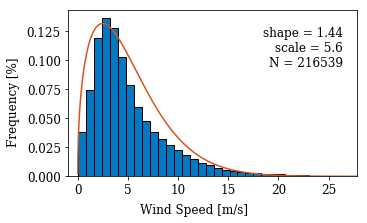

In [84]:
varcol, vertloc, _= utils.get_vertical_locations(catinfo['columns']['speed'], location=87)

# for col, loc in zip(varcol,vertloc):
fig,ax = vis.hist(metdat, catinfo, 'speed', vertloc=122, fit='weibull')
fig.savefig(os.path.join(figPath,'speed_hist_fits.png'), dpi=200, bbox_inches='tight')

In [7]:
catinfo['columns'].keys()

dict_keys(['air density', 'air pressure', 'air temperature', 'coherent tke', 'direction', 'gradient richardson', 'monin-obukhov length', 'relative humidity', 'speed', 'stability flag', 'stability parameter z/l', 'ti', 'turbulent kinetic energy', 'wind shear', 'wind veer'])

In [12]:
imp.reload(vis)

<module 'vis' from '../vis.py'>

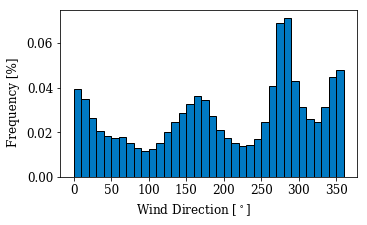

In [83]:
fig,ax = vis.hist(metdat, catinfo, 'direction', vertloc=122, bins=36)
fig.savefig(os.path.join(figPath,'windhist_fullyear.png'), dpi=200, bbox_inches='tight')

In [78]:
imp.reload(vis)

<module 'vis' from '../vis.py'>

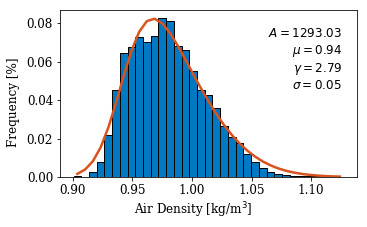

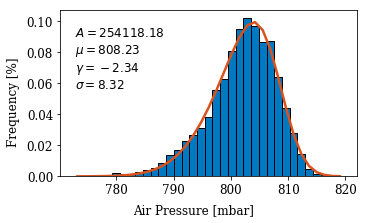

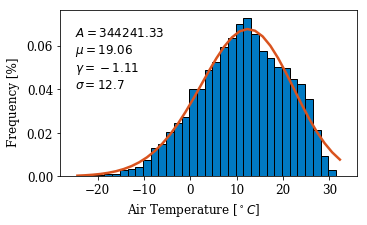

In [80]:
cats = ['air density', 'air pressure', 'air temperature']
gamma = [4.0, 4.0, -10]
for ic,cat in enumerate(cats):
    varcol, varheight, _ = utils.get_vertical_locations(catinfo['columns'][cat], location=122)
    fig, ax = vis.hist(metdat, catinfo, cat, bins=35, vertloc=122)
#     data = metdat[varcol].dropna()
    vis.fit_skewedgaussian(metdat[varcol].dropna(),bins=35, ax=ax, gamma=gamma[ic])#, xy=(1.35,0.9))
    savecat = catinfo['save'][cat]
#     catfigpath = os.path.join(figPath,savecat)
    fig.savefig(os.path.join(figPath,'{}_{}_hist_{}_fit.png'.format(towerID, savecat, varheight)), dpi=200, bbox_inches='tight')


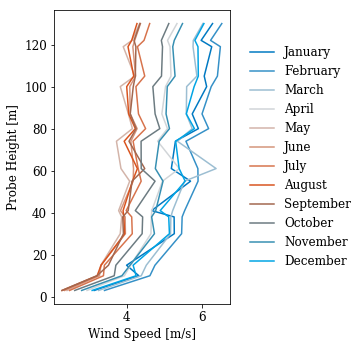

In [16]:
cat = 'speed'
fig,ax = vis.monthly_profile(metdat, catinfo, cat)
savecat = catinfo['save'][cat]
fig.savefig(os.path.join(figPath,'{}_{}_monthly_profile.png'.format(towerID, savecat, varheight)), dpi=200, bbox_inches='tight')


In [47]:
imp.reload(utils)

<module 'utils' from '../utils.py'>

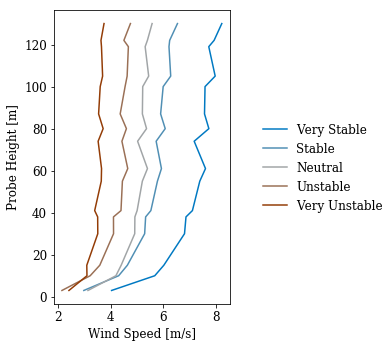

In [49]:
fig,ax = vis.stability_profile(metdat, catinfo, cat)
savecat = catinfo['save'][cat]
fig.savefig(os.path.join(figPath,'{}_{}_stability_profile.png'.format(towerID, savecat, varheight)), dpi=200, bbox_inches='tight')


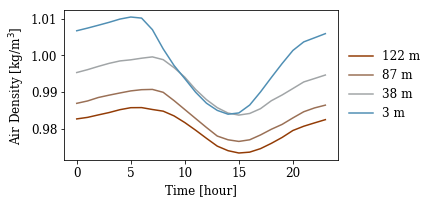

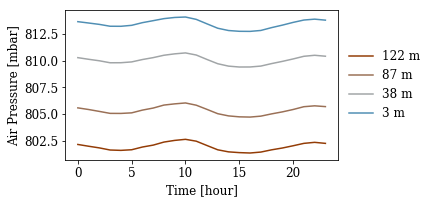

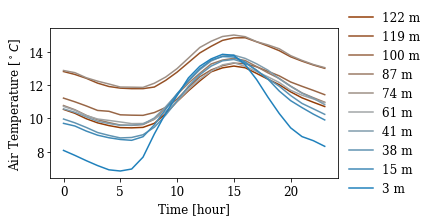

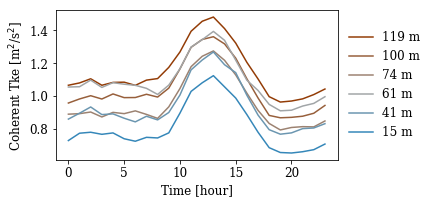

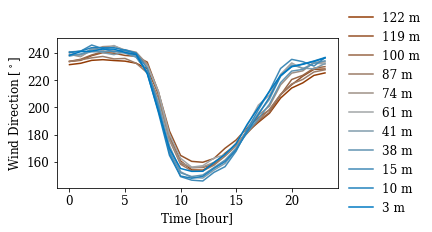

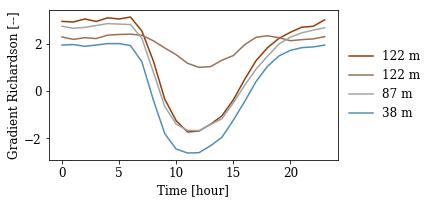

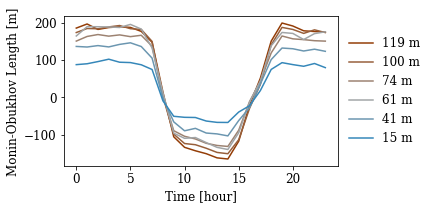

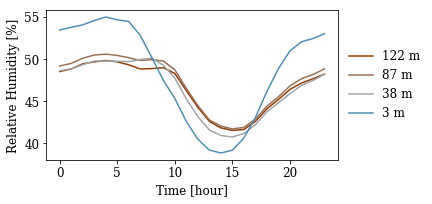

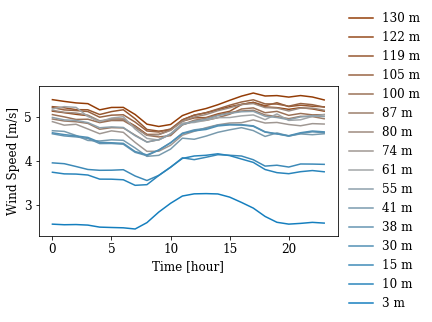

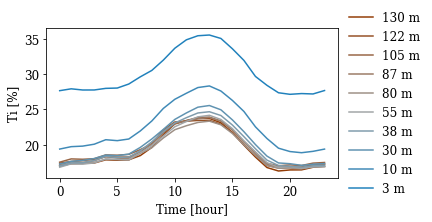

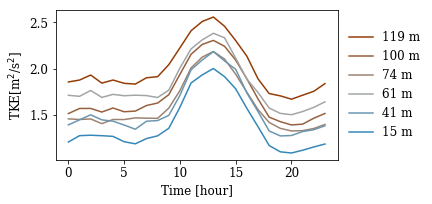

In [50]:
for cat in catinfo['columns']:
    if 'shear' in cat:
        continue
    if 'veer' in cat:
        continue    
    if 'stability' in cat:
        continue 
    fig, ax = vis.hourlyplot(metdat, catinfo, cat)
#     fig.savefig(os.path.join(figPath,'{}_{}_hourly.png'.format(towerID, cat)), bbox_inches='tight', dpi=200)
#     fig.clf()

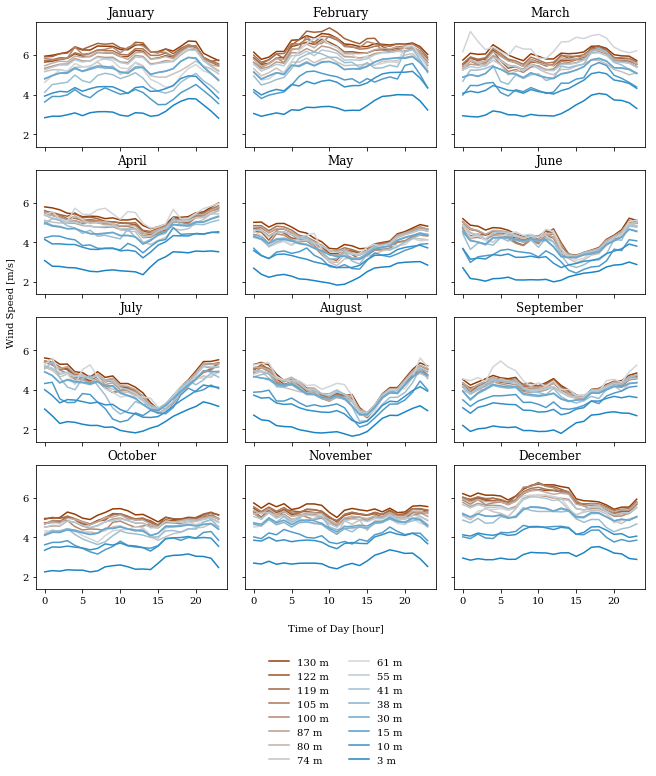

In [16]:
cat='speed'
fig, ax = vis.monthlyhourlyplot(metdat, catinfo, cat)
savecat = catinfo['save'][cat]
fig.savefig(os.path.join(figPath,'{}_{}_monthly.png'.format(towerID, savecat, varheight)), dpi=200, bbox_inches='tight')


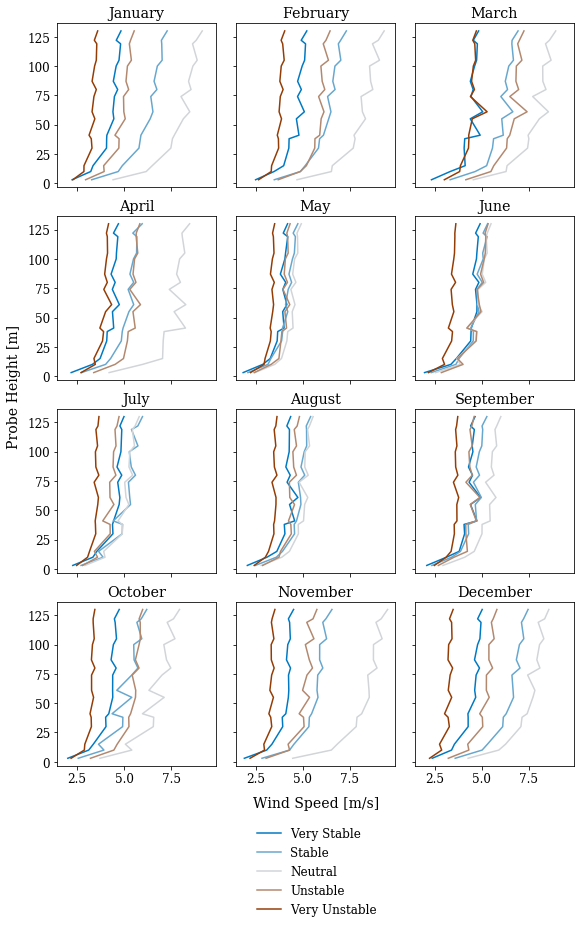

In [36]:
cat = 'speed'
fig, ax, = vis.monthly_stability_profiles(metdat, catinfo, cat)

/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


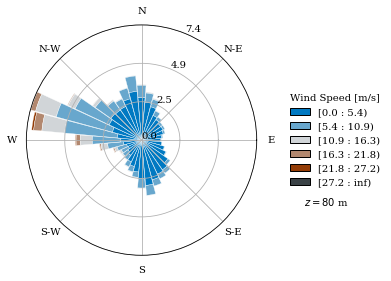

In [18]:
fig,ax,leg = vis.rose_fig(metdat, catinfo, cat)

/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/nhamilto/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


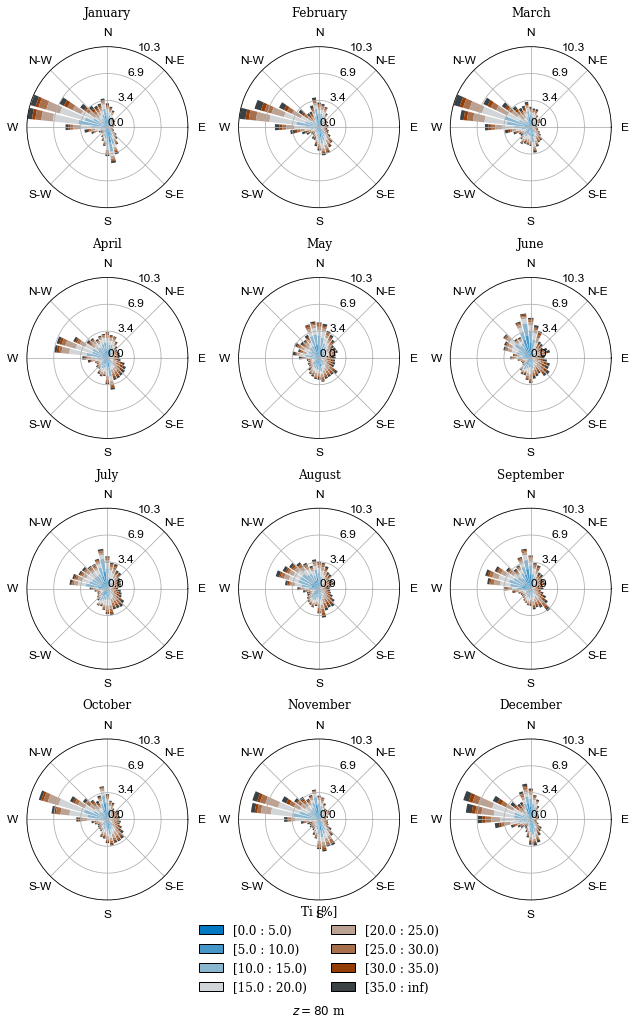

In [60]:
fig,ax,leg = vis.monthly_rose_fig(metdat, catinfo, 'ti', bins = [0.0,5,10,15,20,25,30,35])

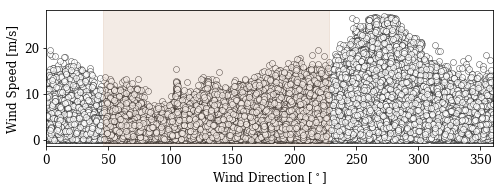

In [22]:
imp.reload(vis)
fig, ax = vis.winddir_scatter(metdat, catinfo, cat, vertloc=87)

In [28]:
catinfo['columns'].keys()

dict_keys(['air density', 'air pressure', 'air temperature', 'coherent tke', 'direction', 'gradient richardson', 'monin-obukhov length', 'relative humidity', 'speed', 'stability flag', 'stability parameter z/l', 'ti', 'turbulent kinetic energy', 'wind shear', 'wind veer'])

In [47]:
plotvars,a,b = utils.get_vertical_locations(catinfo['columns']['wind shear'])

In [51]:
b

[5, 6, 2, 3, 4, 0, 1]

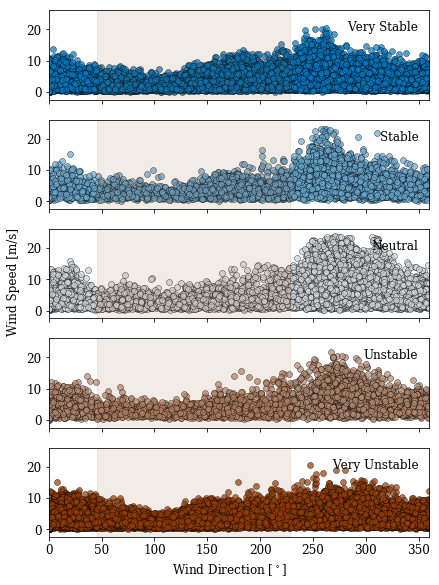

In [59]:
fig, ax = vis.stability_winddir_scatter(metdat, catinfo, 'speed', vertloc=30)

In [52]:
imp.reload(vis)

<module 'vis' from '../vis.py'>

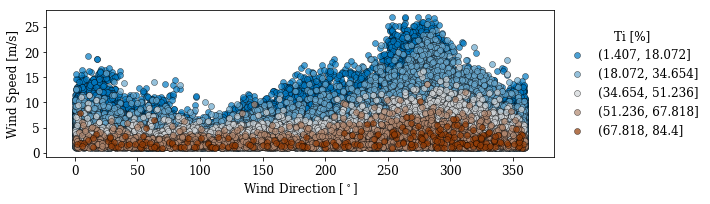

In [53]:
fig,ax = vis.groupby_scatter(metdat, catinfo, cat, 'direction', 'ti')
fig.set_size_inches(8,3)
fig.tight_layout()
fig.savefig(os.path.join(figPath,))

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


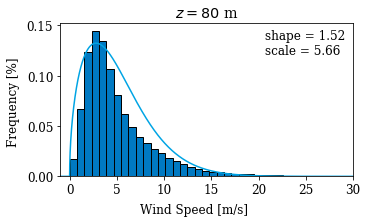

In [14]:
cat = 'speed'
fig,ax = vis.hist(metdat, catinfo, cat, fitweib=True)

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


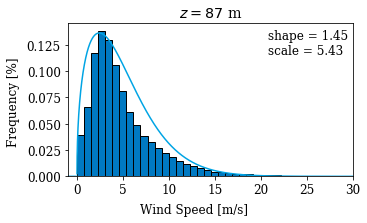

In [15]:
cat = 'speed'
fig,ax = vis.hist(metdat, catinfo, cat, vertloc=87, fitweib=True)

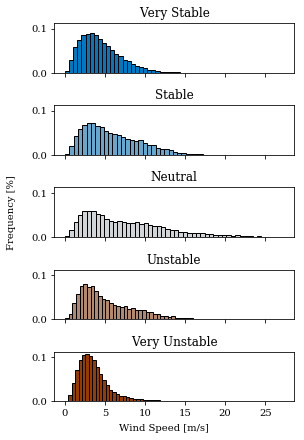

In [19]:
fig,ax = vis.hist_by_stability(metdat, catinfo, cat)

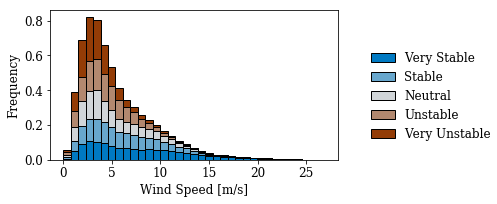

In [55]:
imp.reload(vis)
fig,ax = vis.stacked_hist_by_stability(metdat,catinfo,cat)

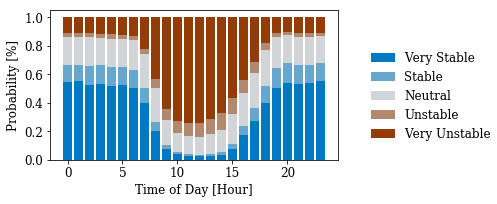

In [19]:
imp.reload(vis)
fig, ax = vis.normalized_hist_by_stability(metdat, catinfo)
fig.savefig(os.path.join(figPath,'M5_normalized_stability_flag.png'),bbox_inches='tight', dpi=200)

../vis.py:1070: PerformanceWarning: indexing past lexsort depth may impact performance.
  pdat = temp.loc[ii+1,cond]


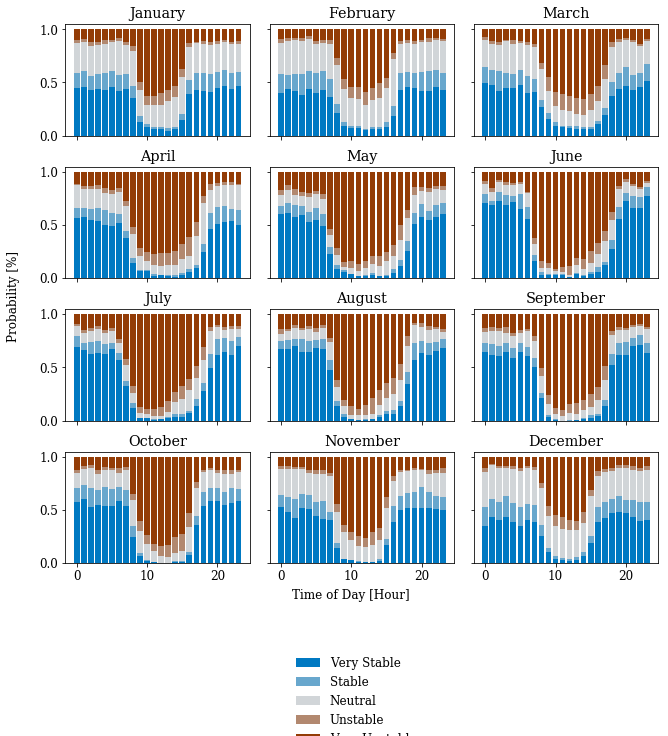

In [20]:
imp.reload(vis)
fig, ax = vis.normalized_monthly_hist_by_stability(metdat,catinfo)
fig.savefig(os.path.join(figPath,'M5_normalized_stability_flag_monthly.png'),bbox_inches='tight', dpi=200)


In [21]:
os.path.join(figPath,'M5_normalized_stability_flag_monthly.png')

'../figs/M5_normalized_stability_flag_monthly.png'

In [22]:
catinfo['columns']['direction']

['Direction (Vane_ 122 m)',
 'Direction (Vane_ 87 m)',
 'Direction (Vane_ 38 m)',
 'Direction (Vane_ 10 m)',
 'Direction (Vane_ 3 m)',
 'Direction (sonic_119m)',
 'Direction (sonic_100m)',
 'Direction (sonic_74m)',
 'Direction (sonic_61m)',
 'Direction (sonic_41m)',
 'Direction (sonic_15m)']

In [24]:
t1 = metdat['Direction (Vane_ 38 m)'].dropna()
t2 = metdat['Direction (Vane_ 122 m)'].dropna()

In [27]:
test = t1.groupby((t1.index.month, t1.index.hour)).mean() - t2.groupby((t2.index.month, t2.index.hour)).mean()

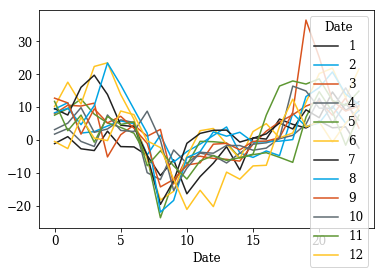

In [32]:
test.unstack().transpose().plot()

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


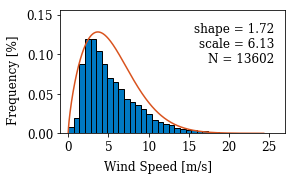

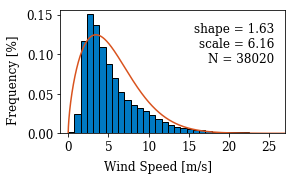

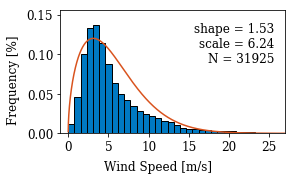

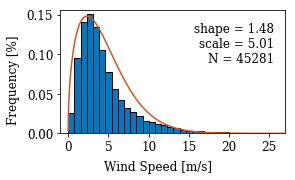

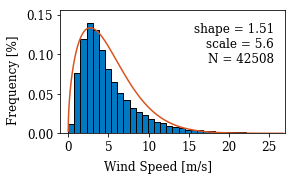

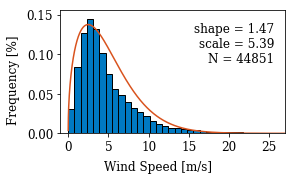

In [70]:
yeardat = metdat.groupby(metdat.index.year)
for year in yeardat.groups.keys():
    fig, ax = vis.hist(yeardat.get_group(year),catinfo, 'speed', fit='weibull')
    ax.set_ylim(bottom=0, top=0.156)
    ax.set_xlim(left=-1.0, right=27)
    fig.set_size_inches(4,2.4)
    fig.tight_layout()
    fig.savefig(os.path.join(figPath,'ws_hist_{}.png'.format(year)),bbox_inches='tight',dpi=200)

/Users/nhamilto/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1301: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


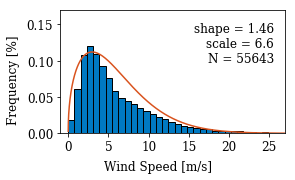

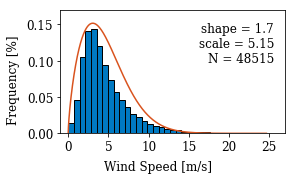

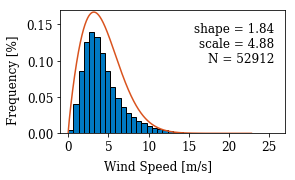

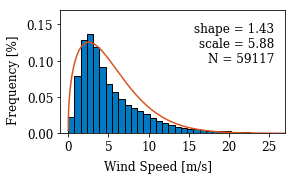

In [71]:
qdat = metdat.groupby(metdat.index.quarter)
for quarter in qdat.groups.keys():
    fig, ax = vis.hist(qdat.get_group(quarter),catinfo, 'speed', fit='weibull')
    ax.set_ylim(bottom=0, top=0.17)
    ax.set_xlim(left=-1.0, right=27)
    fig.set_size_inches(4,2.4)
    fig.tight_layout()
    fig.savefig(os.path.join(figPath,'ws_hist_Q{}.png'.format(quarter)),bbox_inches='tight',dpi=200)

In [62]:
qdat = metdat.groupby(metdat.index.quarter)

In [63]:
qdat.groups.keys()

dict_keys([1, 2, 3, 4])